# JS11 - Klasifikasi 2

Hanif Faishal Hilmi

TI-3F

Absen 15

## Lab 1
Klasifikasi SVM dengan Data Dummy Linier

### Langkah 1 - Import Library

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Langkah 2 - Membuat Data Dummy

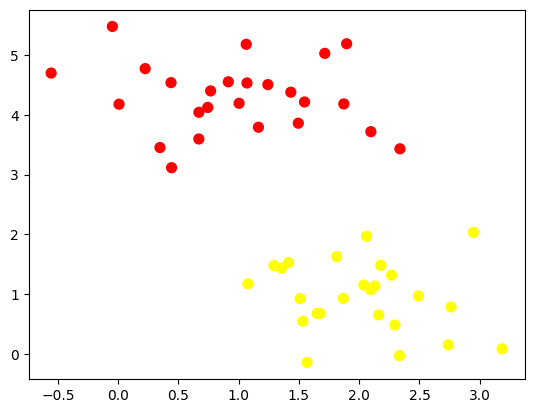

In [106]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

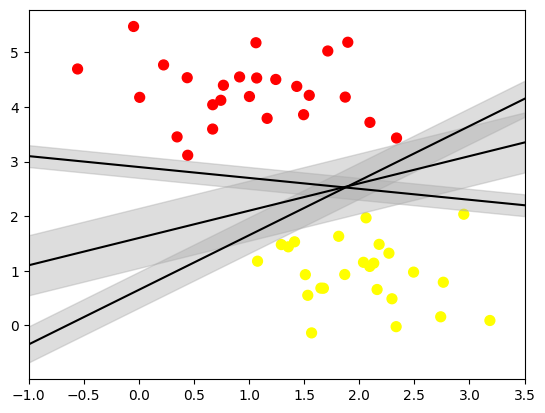

In [107]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### Langkah 5 - Fitting Model

In [108]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [109]:
# fungsii menampilkan fitting data
def plot_scv_decision_function(mode, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # membuat grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = mode.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

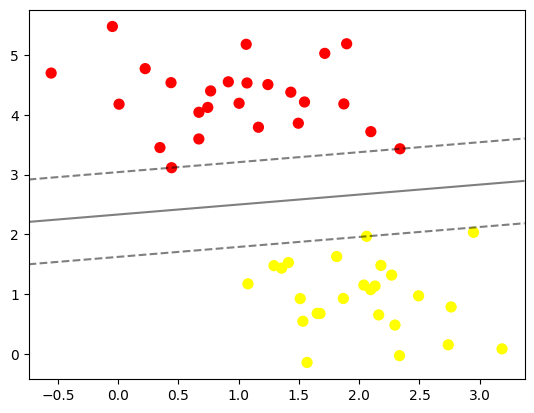

In [110]:
# Melakukan plotting
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_scv_decision_function(model)

In [111]:
# instalasi ipywidgets
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Lab 2
Klasifikasi SVM dengan Data Dummy Non-Linier

### Langkah 1 - Ilustrasi Data Non-Linier

#### Langkah 1a - Import Library

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

#### Langkah 1b - Buat Kembali Fungsi Plotting

In [113]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### Langkah 1c - Buat Data Dummy Non-Linier

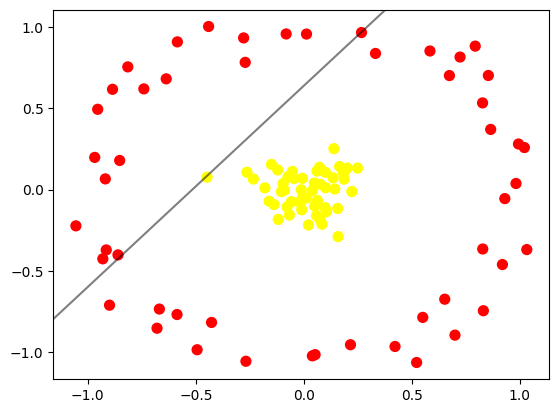

In [114]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_scv_decision_function(clf, plot_support=False)

In [115]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed


r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.07295934,  0.13719155],
       [-0.08987745, -0.00444206],
       [ 0.99412224,  0.28067042],
       [ 0.13541778,  0.0726806 ],
       [-0.00669572,  0.0693006 ],
       [-0.85238302,  0.17933462],
       [ 0.98246117,  0.03747498],
       [-0.00737048, -0.05156858],
       [ 0.07533612, -0.18462333],
       [-0.5854177 ,  0.90979155],
       [ 0.91963739, -0.46172033],
       [-0.96795359,  0.19812965],
       [ 0.03978694, -1.02418964],
       [ 0.674189  ,  0.70230674],
       [ 0.10017548,  0.10616712],
       [-0.16063076, -0.0716945 ],
       [ 0.1393923 ,  0.2521923 ],
       [ 0.05936563, -0.16049997],
       [ 0.86534587,  0.37053345],
       [ 0.82775857,  0.53389243],
       [-0.58690597, -0.76946968],
       [-0.10359466, -0.01271407],
       [-0.91455842, -0.37162389],
       [-0.95417029,  0.49458368],
       [ 0.03885907, -0.00754904],
       [-0.14965732,  0.15504453],
       [ 0.07486087,  0.03385744],
       [

### Langkah 2 - Fitting Model

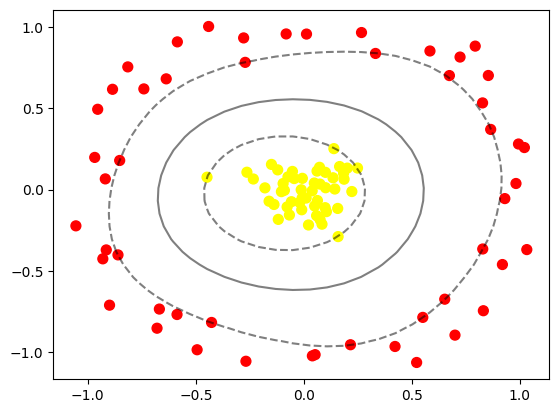

In [116]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Lab 3
SVM Data Overlapping

### Langkah 1 - Import Library dan Buat Fungsi Plotting

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [118]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 2 - Buat Data Dummy

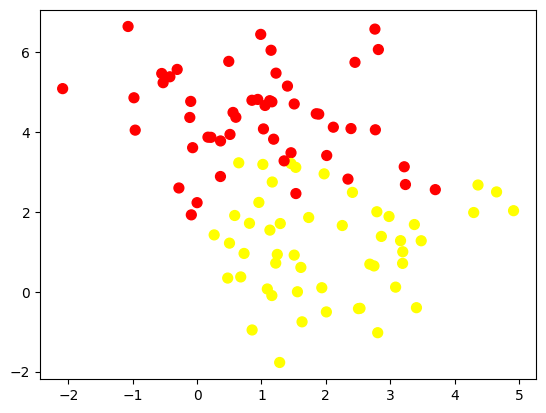

In [119]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

### Langkah 3 - Analisis Dampak Tunning

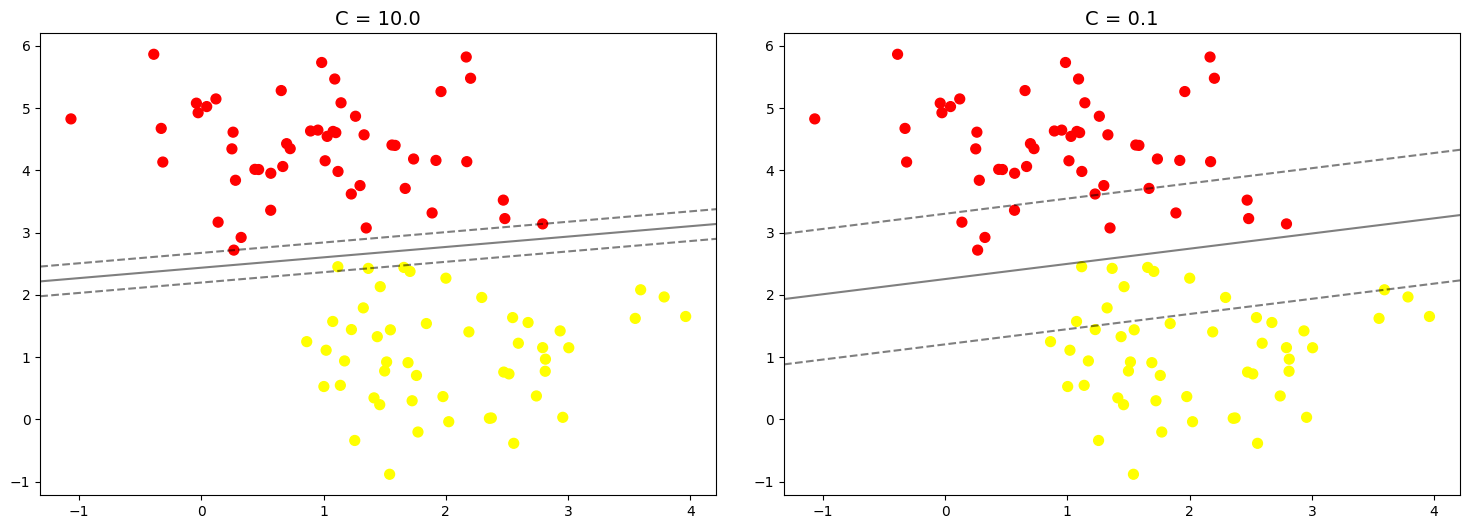

In [120]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Lab 4
Klasifikasi Citra Wajah

### Langkah 0 - Unduh Dataset

In [121]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


### Langkah 1 - Inspeksi Citra Wajah

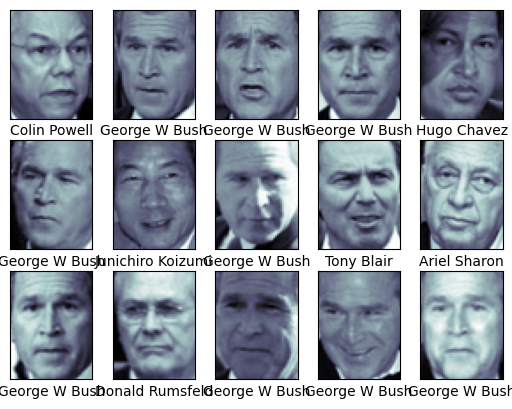

In [122]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Langkah 2 - Pra Pengolahan Data

In [123]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pca, svc)

### Langkah 3 - Split Data

In [124]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Langkah 4 - Pembuatan Model + Tunning

In [125]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 11.2 s
Wall time: 22.6 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [126]:
# model terbaik

model = grid.best_estimator_
yfit = model.predict(Xtest)

### Langkah 5 - Cek Hasil Prediksi

Text(0.5, 1.1, 'Predicted name; Incorrect Labels in Red')

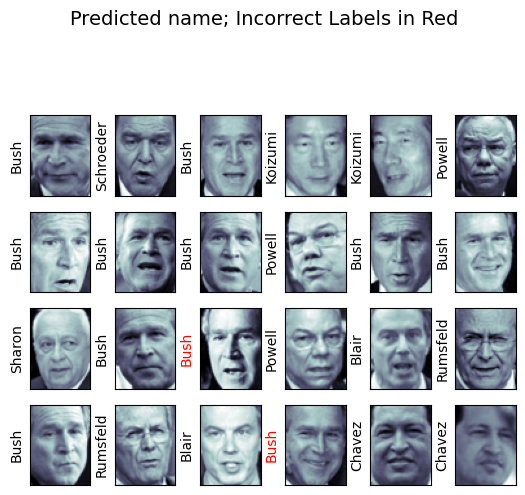

In [127]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[ytest[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted name; Incorrect Labels in Red', size=14, y=1.1)

### Langkah 6 - Cek Performansi

In [128]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

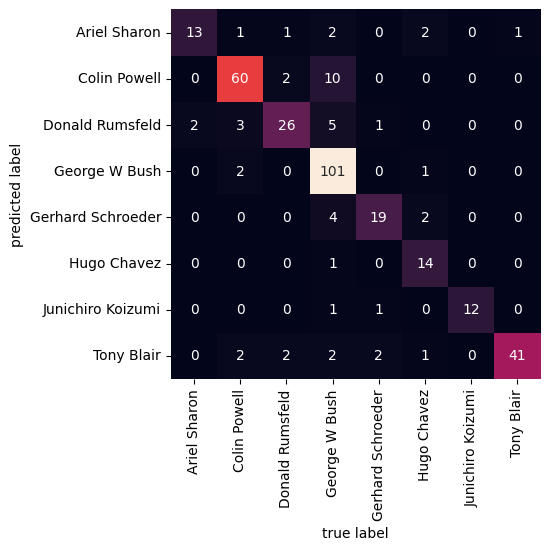

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Lab 5
Klasifikasi Citra Siang dan Malam

### Langkah 0 - Import Library

In [130]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [132]:
train_dir = "images/training"
test_dir = "images/test"

### Langkah 1 - Load Data dan Visualisasikan

In [133]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

Image 177
(531, 800, 3)
Shape	: (593, 800, 3)
Label	: night


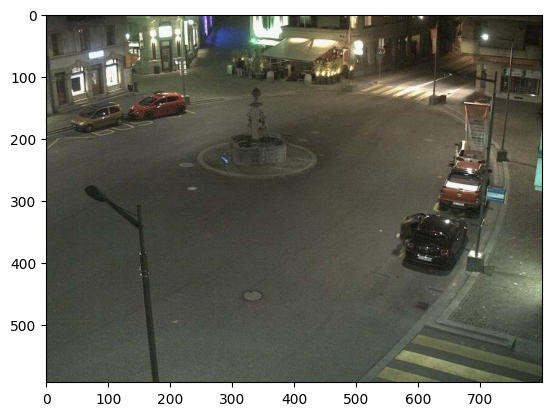

In [134]:
# Load training data
train_img = load_dataset(train_dir)

# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

### Langkah 3 - Pra Pengolahan Data

In [135]:
# fungsi menstandarkan ukuran gambar

def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

# fungsi encoding label
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

# fungsi preprocessing
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

train_std_img_list = preprocess(train_img)

Image 173
(600, 1100, 3)


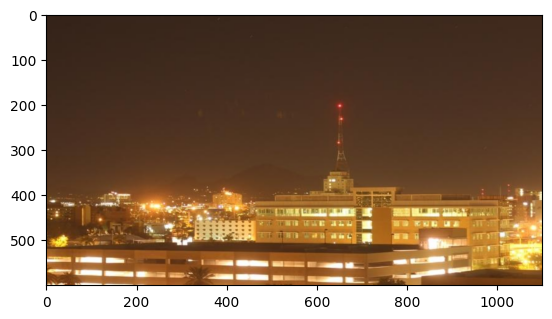

In [136]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)
plt.imshow(train_std_img_list[pick_random][0])

### Langkah 4 - Ekstraksi Fitur

In [137]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 40
Avg Brighness: 138.8352


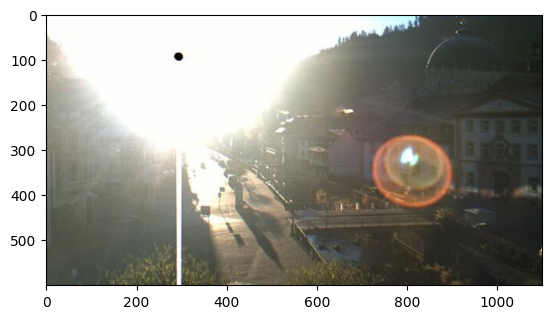

In [138]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [139]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

Image 136
Actual label: 0
Predicted label: 0


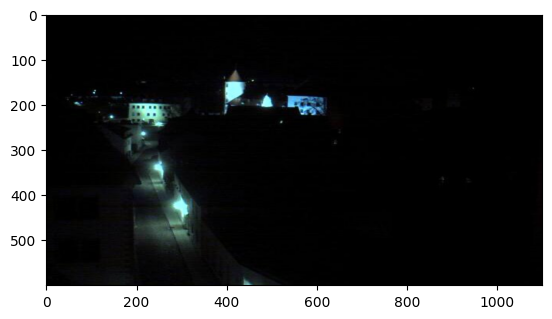

In [140]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 6 - Evaluasi Manual

In [141]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [142]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [143]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### Klasifikasi dengan SVM

Langkah 4 Alternatif - Membuat Feature Vectors.

In [144]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [145]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.092992,1.0
1,192.907867,1.0
2,132.133823,1.0
3,199.749191,1.0
4,109.947203,1.0


In [146]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.228062,1.0
1,157.826662,1.0
2,201.607444,1.0
3,191.237441,1.0
4,188.119652,1.0


### Langkah 5 - Buat Model SVM

In [147]:


# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

print("X_train shape:", X_train.shape)
print("y_train unique:", y_train.unique())
print("y_train dtype:", y_train.dtype)




X_train shape: (240, 1)
y_train unique: [1. 0.]
y_train dtype: float64


In [148]:
# import requied library
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### Langkah 6 - Evaluasi

In [149]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


## TUGAS LAB

1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,
    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
        i. Gunakan model dengan kernel linier.
        ii. Gunakan model dengan kernel polynomial.
        iii. Gunakan model dengan kernel RBF.
    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.
2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [150]:
import pandas as pd
import numpy as np

# ambil dataset voice
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [151]:
# Split data and label
X = data.drop(columns=['label'])
y = data['label']

In [152]:
# encode dan normalisasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode label (male/female -> 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [153]:
from sklearn.model_selection import train_test_split

# Split data 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model kernel linear
svm_linear_70 = SVC(kernel='linear')
svm_linear_70.fit(X_train_70, y_train_70)
acc_linear_70 = accuracy_score(y_test_30, svm_linear_70.predict(X_test_30))

# Model kernel polynomial
svm_poly_70 = SVC(kernel='poly')
svm_poly_70.fit(X_train_70, y_train_70)
acc_poly_70 = accuracy_score(y_test_30, svm_poly_70.predict(X_test_30))

# Model kernel RBF
svm_rbf_70 = SVC(kernel='rbf')
svm_rbf_70.fit(X_train_70, y_train_70)
acc_rbf_70 = accuracy_score(y_test_30, svm_rbf_70.predict(X_test_30))

# Split data 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model kernel linear
svm_linear_80 = SVC(kernel='linear')
svm_linear_80.fit(X_train_80, y_train_80)
acc_linear_80 = accuracy_score(y_test_20, svm_linear_80.predict(X_test_20))

# Model kernel polynomial
svm_poly_80 = SVC(kernel='poly')
svm_poly_80.fit(X_train_80, y_train_80)
acc_poly_80 = accuracy_score(y_test_20, svm_poly_80.predict(X_test_20))

# Model kernel RBF
svm_rbf_80 = SVC(kernel='rbf')
svm_rbf_80.fit(X_train_80, y_train_80)
acc_rbf_80 = accuracy_score(y_test_20, svm_rbf_80.predict(X_test_20))

results = pd.DataFrame({
    'Split': ['70:30', '70:30', '70:30', '80:20', '80:20', '80:20'],
    'Kernel': ['Linear', 'Polynomial', 'RBF', 'Linear', 'Polynomial', 'RBF'],
    'Accuracy': [
        acc_linear_70, acc_poly_70, acc_rbf_70,
        acc_linear_80, acc_poly_80, acc_rbf_80
    ]
})

print("\n📊 Hasil Performa Model SVM")
print(results)


📊 Hasil Performa Model SVM
   Split      Kernel  Accuracy
0  70:30      Linear  0.970557
1  70:30  Polynomial  0.956887
2  70:30         RBF  0.981073
3  80:20      Linear  0.976341
4  80:20  Polynomial  0.968454
5  80:20         RBF  0.982650


2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!


In [154]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [155]:
# ============================
# Load dataset
# ============================
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [156]:
# data training dan testing
train_dir = "images/training"
test_dir = "images/test"

train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

# gabungkan semua train dan test untuk split ulang
all_data = train_img + test_img

print(f"Total dataset : {len(all_data)} gambar")

Total dataset : 400 gambar


In [157]:
# ============================
# Ekstraksi Fitur Histogram
# ============================

import cv2

def extract_hist_features(img_list, bins=32):
    features = []
    labels = []

    for img, label in img_list:
        # Histogram setiap channel RGB
        hist_r = cv2.calcHist([img], [0], None, [bins], [0, 256])
        hist_g = cv2.calcHist([img], [1], None, [bins], [0, 256])
        hist_b = cv2.calcHist([img], [2], None, [bins], [0, 256])

        # Normalisasi
        hist_r = cv2.normalize(hist_r, hist_r).flatten()
        hist_g = cv2.normalize(hist_g, hist_g).flatten()
        hist_b = cv2.normalize(hist_b, hist_b).flatten()

        # Gabungkan semua fitur
        hist_feature = np.concatenate((hist_r, hist_g, hist_b))
        features.append(hist_feature)
        labels.append(label)
    
    return np.array(features), np.array(labels)

X, y = extract_hist_features(all_data)
print(f"Fitur shape: {X.shape}")


Fitur shape: (400, 96)


In [158]:
# ============================
# Encoding label
# ============================

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print("Kelas:", le.classes_)

Kelas: ['day' 'night']


In [159]:
# ============================
# Split data (80:20)
# ============================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
# ============================
# Model SVM dengan kernel RBF + Hyperparameter Tuning
# ============================

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


Akurasi Model RBF: 100.00%

Classification Report:
              precision    recall  f1-score   support

         day       1.00      1.00      1.00        42
       night       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



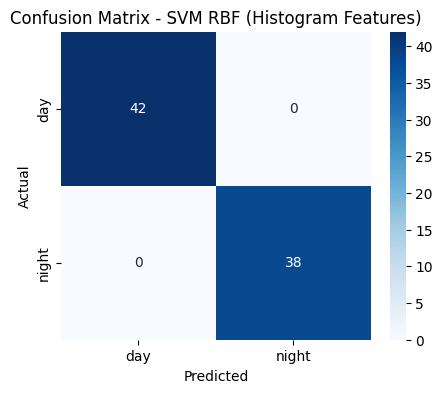

In [162]:
# ============================
# Evaluasi model
# ============================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model RBF: {acc*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - SVM RBF (Histogram Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()